## Real-k result analysis

In [1]:
import numpy as np
import pandas as pd
import glob 
import csv
import traceback
import datetime
import os
import matplotlib.pyplot as plt
from collections import defaultdict
%matplotlib inline
pd.options.display.max_columns=50


def draw(prefix, metric, dataset):
    results = glob.glob(f'../results/performances/{prefix}-*')   # quick- or www21- or fld-
    list1, list2 = zip(*sorted(zip([os.stat(result).st_size for result in results], results)))

    full_results = defaultdict(list)
    # Retrieving results
    num_logs = len([i for i in list1 if i > 1000])
    count= 0
    for i in range(1,num_logs+1):
        try:
            df = pd.read_csv(list2[-i])
            rolling_mean7 = df[metric].rolling(window=7).mean()
            rolling_mean13 = df[metric].rolling(window=13).mean()
            filename = list2[-i][list2[-i].index('16'):list2[-i].index('16')+10]
            info = ','.join(list(df[['data', 'sampling', 'subsamplings']].iloc[0]))
            full_results[info].append(rolling_mean7)
            count += 1
        except:
            print('loading error:', list2[-i])
            continue
    
    plt.figure()
    ymin = []
    ymax = []
    result_one_dataset = [key for key in full_results.keys() if dataset+',' in key]
    print(result_one_dataset)
    print('The number of trials for each setting (Results are averaged):')
    for key in result_one_dataset:
        avg_result = pd.concat([*full_results[key]], axis=1).mean(axis=1)
    #     print(pd.concat([*full_results[key]], axis=1))   # Check current running status: debug purpose
        print(key, len(full_results[key]), round(np.mean(avg_result[-1:]), 4))
        plt.plot(avg_result.index, avg_result, label=key)
        
        rvr = avg_result[avg_result.notna()]
        ymin.append(min(rvr))
        ymax.append(max(rvr))

    # # printing test_illicit_rate
    # tir = pd.read_csv(list2[-1])['test_illicit_rate'].rolling(window=7).mean()
    # plt.plot(tir.index, tir, label='Test illicit rate (ref)')

    plt.title(f'{dataset}: Train: 30 days, Valid: 7 days, Test: 7 days')
    plt.legend(loc='lower left')
    plt.ylabel(metric)
    plt.xlabel('numEpisodes')
    
#     ymin = 
    plt.ylim(np.min(ymin)*0.9, np.max(ymax)*1.1)
    plt.show()
    plt.close()

### Results

In [2]:
prefix = 'kcstest'

['real-k,hybrid,xgb/random', 'real-k,random,-', 'real-k,risky,-', 'real-k,DATE,-', 'real-k,xgb,-']
The number of trials for each setting (Results are averaged):
real-k,hybrid,xgb/random 5 0.2965
real-k,random,- 5 0.2549
real-k,risky,- 5 0.3968
real-k,DATE,- 5 0.4267
real-k,xgb,- 5 0.3416


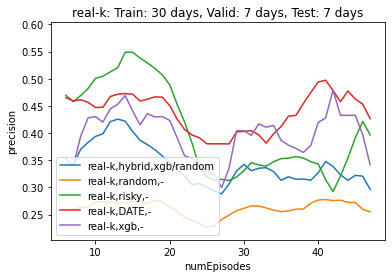

In [3]:
draw(prefix=prefix, metric='precision', dataset='real-k')

['real-k,hybrid,xgb/random', 'real-k,random,-', 'real-k,risky,-', 'real-k,DATE,-', 'real-k,xgb,-']
The number of trials for each setting (Results are averaged):
real-k,hybrid,xgb/random 5 0.0111
real-k,random,- 5 0.0495
real-k,risky,- 5 0.0577
real-k,DATE,- 5 0.0316
real-k,xgb,- 5 0.0038


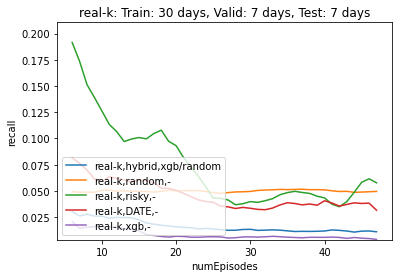

In [4]:
draw(prefix=prefix, metric='recall', dataset='real-k')

['real-k,hybrid,xgb/random', 'real-k,random,-', 'real-k,risky,-', 'real-k,DATE,-', 'real-k,xgb,-']
The number of trials for each setting (Results are averaged):
real-k,hybrid,xgb/random 5 0.0101
real-k,random,- 5 0.048
real-k,risky,- 5 0.2086
real-k,DATE,- 5 0.0687
real-k,xgb,- 5 0.0036


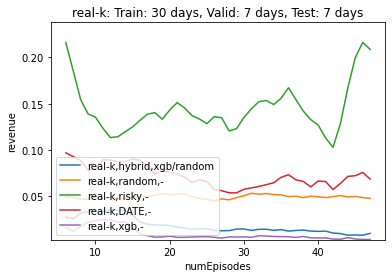

In [5]:
draw(prefix=prefix, metric='revenue', dataset='real-k')